In [4]:
from neuralprophet import NeuralProphet

In [8]:
from read_data_no_index import read_data
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
VNI=read_data('D:\VNI.csv')

In [12]:
VNI=VNI[(VNI['Date'] >= '2018-01-01') & (VNI['Date'] <= '2024-06-21')]
VNI=VNI[['Date','Close']]

In [14]:
VNI.columns=['ds','y']

# Train the Model

In [17]:
model = NeuralProphet()
model.fit(VNI)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.893% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: |                                                                                      | 0/? [00:00<…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (51) is too small than the required number                     for the learning rate finder (230). The results might not be optimal.


Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - D:\Anaconda\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - D:\Anaconda\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 14. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |                                                                                      | 0/? [00:00<…

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.357693,0.0,493.871582,594.446594,0.357090,0.0,0
1,0.207209,0.0,325.083527,390.094788,0.205816,0.0,1
2,0.090446,0.0,186.761490,227.297028,0.090104,0.0,2
3,0.044538,0.0,117.531258,152.575165,0.044361,0.0,3
4,0.037773,0.0,105.155060,139.870132,0.037864,0.0,4
...,...,...,...,...,...,...,...
95,0.005272,0.0,41.635567,51.661785,0.005287,0.0,95
96,0.005244,0.0,41.329578,51.530647,0.005235,0.0,96
97,0.005250,0.0,41.282101,51.407307,0.005268,0.0,97
98,0.005236,0.0,41.435135,51.570694,0.005251,0.0,98


# Evaluate the Model

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.893% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.893% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.893% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


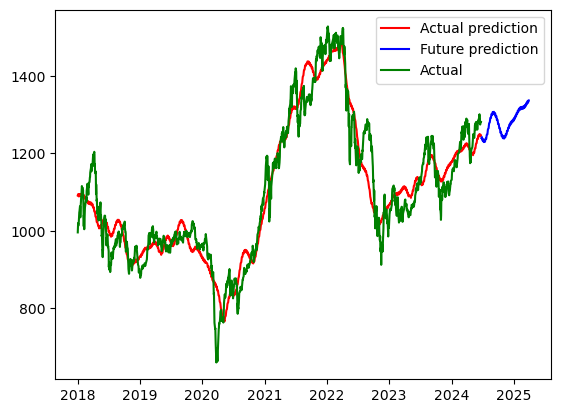

In [20]:
future = model.make_future_dataframe(VNI,periods=200)
forecast = model.predict(future)
actual_prediction=model.predict(VNI)
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='Actual prediction',c='r')
plt.plot(forecast['ds'],forecast['yhat1'],label='Future prediction',c='b')
plt.plot(VNI['ds'],VNI['y'],label='Actual',c='g')
plt.legend()
plt.show()